In [11]:
import pandas as pd

df = pd.read_csv("movies.csv")

print(df.head())

print(df.tail())




                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualisasi Data Mentah
print("\n--- Informasi Awal Dataset ---")
df.info()


--- Informasi Awal Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Gambar 'visualisasi_skor_mentah.png' telah disimpan.


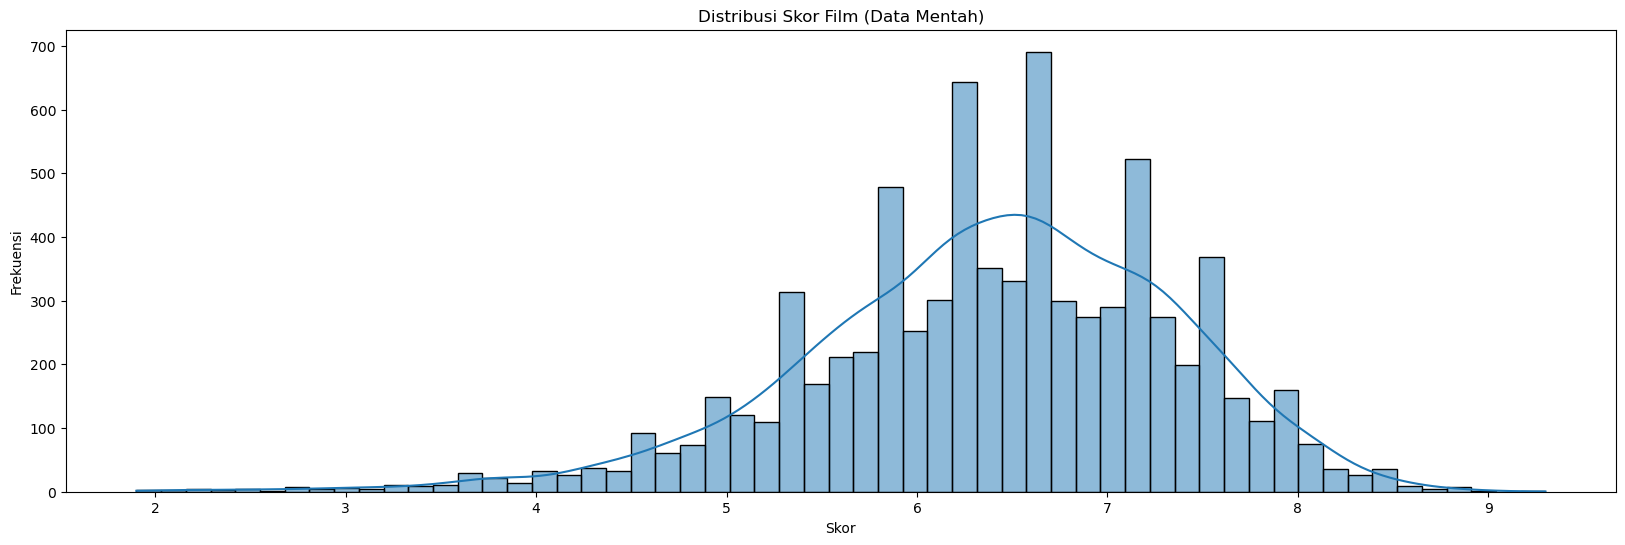

In [30]:
# Visualisasi 1: Distribusi Skor Film (Data Mentah)
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True)
plt.title('Distribusi Skor Film (Data Mentah)')
plt.xlabel('Skor')
plt.ylabel('Frekuensi')
plt.savefig('visualisasi_skor_mentah.png')
print("Gambar 'visualisasi_skor_mentah.png' telah disimpan.")

In [26]:
# 2. Preprocessing Data

print("\n--- Jumlah Nilai Hilang Sebelum Preprocessing ---")
print(df.isnull().sum())


--- Jumlah Nilai Hilang Sebelum Preprocessing ---
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [34]:
# Menghapus baris dengan data kosong pada kolom-kolom penting
df_cleaned = df.dropna(subset=['budget', 'gross', 'score', 'company', 'runtime'])

In [38]:
# Mengubah tipe data 'budget' dan 'gross' menjadi integer untuk kalkulasi
df_cleaned = df_cleaned.copy() # Membuat salinan untuk menghindari warning
df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')
print("\n--- Informasi Dataset Setelah Dibersihkan ---")
df_cleaned.info()



--- Informasi Dataset Setelah Dibersihkan ---
<class 'pandas.core.frame.DataFrame'>
Index: 5433 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5433 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5433 non-null   object 
 3   year      5433 non-null   int64  
 4   released  5433 non-null   object 
 5   score     5433 non-null   float64
 6   votes     5433 non-null   float64
 7   director  5433 non-null   object 
 8   writer    5433 non-null   object 
 9   star      5433 non-null   object 
 10  country   5432 non-null   object 
 11  budget    5433 non-null   int64  
 12  gross     5433 non-null   int64  
 13  company   5433 non-null   object 
 14  runtime   5433 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 679.1+ KB


Gambar 'visualisasi_heatmap_bersih.png' telah disimpan.


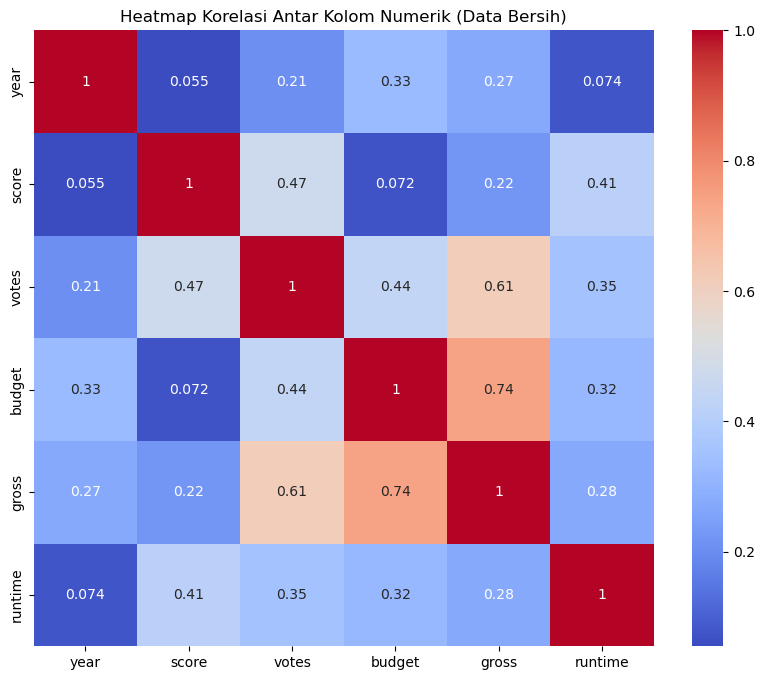

In [42]:
# 3. Visualisasi Data Bersih

# Visualisasi 2: Heatmap Korelasi (Data Bersih)
plt.figure(figsize=(10, 8))
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Kolom Numerik (Data Bersih)')
plt.savefig('visualisasi_heatmap_bersih.png')
print("Gambar 'visualisasi_heatmap_bersih.png' telah disimpan.")

Gambar 'visualisasi_top_film_bersih.png' telah disimpan.


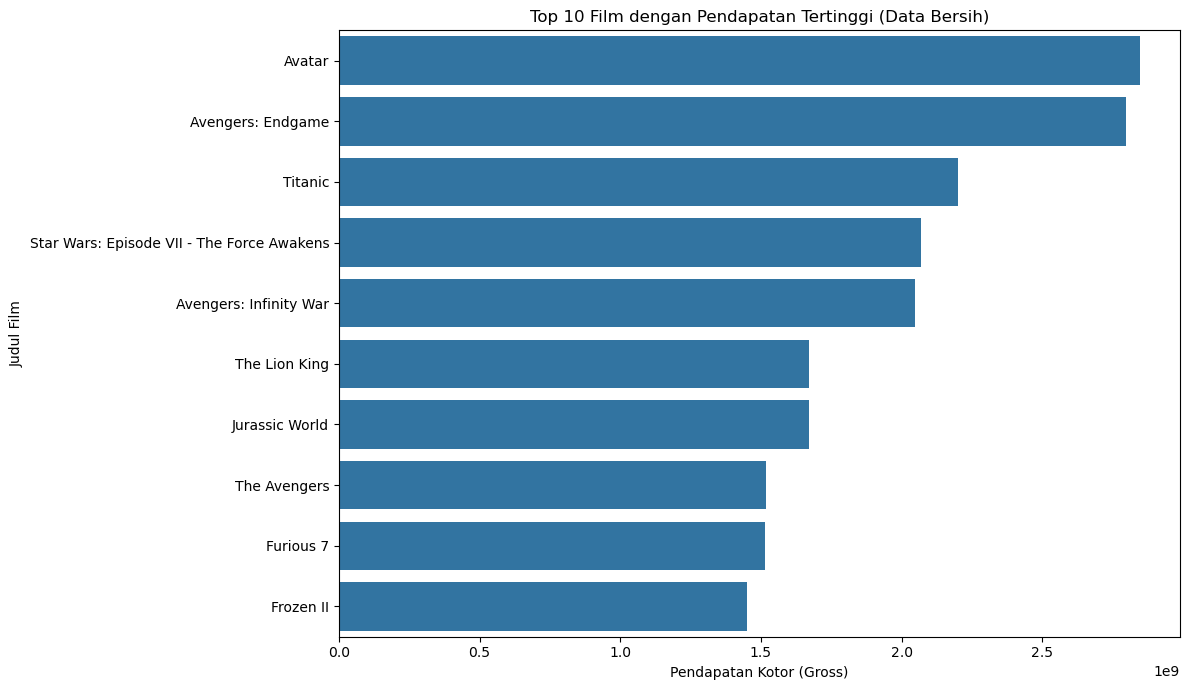

In [44]:
# Visualisasi 3: 10 Film dengan Pendapatan Tertinggi (Data Bersih)
top_10_gross = df_cleaned.sort_values(by='gross', ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x='gross', y='name', data=top_10_gross)
plt.title('Top 10 Film dengan Pendapatan Tertinggi (Data Bersih)')
plt.xlabel('Pendapatan Kotor (Gross)')
plt.ylabel('Judul Film')
plt.tight_layout()
plt.savefig('visualisasi_top_film_bersih.png')
print("Gambar 'visualisasi_top_film_bersih.png' telah disimpan.")
